# ***Logistic Regression: Comprehensive Exercise***

**Write up and Coding Set 2**

***Members***
- Diao, Michael Anthony
- Lampa, Kenzo Nicolo
- Reyes, Darylle Joshua

------------------------------------------------

**Submission Guidelines**

1. Please submit your work in PDF format and ensure that it includes all necessary details as specified in the corresponding item number.
2. All modules or libraries used must be clearly documented.
3. Each line of code should be accompanied by a description explaining its function; simply providing a series of code lines will not be sufficient for scoring points.
4. Each part is worth 10 points each.

--------------------------------------------------------------------

 **Dataset**

**Heart Disease Dataset** (available from UCI Machine Learning Repository or Kaggle)
This dataset contains information about patients and whether they have heart disease, with 303
observations and 13 predictor variables.
*Target Variable:* target (1 = presence of heart disease, 0 = no heart disease)

**Predictor Variables:** <br>

- age: Age in years <br>
- sex: Sex (1 = male, 0 = female) <br>
- cp: Chest pain type (0-3)<br>
- trestbps: Resting blood pressure (mm Hg)<br>
- chol: Serum cholesterol (mg/dl)<br>
- fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)<br>
- restecg: Resting electrocardiographic results (0-2)<br>
- thalach: Maximum heart rate achieved <br>
- exang: Exercise induced angina (1 = yes, 0 = no) <br>
- oldpeak: ST depression induced by exercise relative to rest<br>
- slope: Slope of the peak exercise ST segment (0-2)<br>
- ca: Number of major vessels colored by fluoroscopy (0-3)<br>
- thal: Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)<br>


----------------------------------------------------------------

## **Exercise Tasks**

------------------------------------------------------------------

***Import Libraries***

In [13]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import ssl
import os
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

***Read Heart-Disease Dataset***

In [14]:
# Create an unverified SSL context
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [15]:
# fetch dataset from UCI Machine Learning Repository
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

**Part 1: Exploratory Data Analysis (EDA)**

**Task 1.1:** Load and examine the dataset <br>
- Load the dataset and display the first few rows<br>
- Check dimensions (rows and columns)<br>
- Display data types for each variable<br>
- Identify and handle missing values (if any)<br>
- Impute the missing values with the mean if continuous and the mode if categorical<br>
- Check for class imbalance in the target variable<br>

In [16]:
# Check first few rows of the dataset
df = pd.concat([X, y], axis = 1)
df = df.rename(columns = {"num": "target"})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [17]:
# Check dimensions
df.shape

(303, 14)

In [18]:
# Display data types for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [19]:
# Identify missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [20]:
# There are missing values in the features: ca and thal, thus, impute the missing values

# Impute mean for ca (continuous variable)
df["ca"] = df["ca"].fillna(df["ca"].mean())

# Impute mode for thal (categorical variable)
df["thal"] = df["thal"].fillna(df["thal"].mode()[0])

df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [21]:
# Check for class imbalance in the target variable
df["target"].value_counts()

# Combine the targets: 1, 2, 3, and 4 to simplify model, where 0 = no heart disease and 1 = presence of heart disease
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

df["target"].value_counts()

,count
target,
0,164
1,139


**Task 1.2:** Visualize distributions<br>
- Create histograms for continuous variables<br>
- Create bar plots for categorical variables<br>
- Create a count plot for the target variable<br>
- Identify potential outliers using boxplots<br>

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>]], dtype=object)

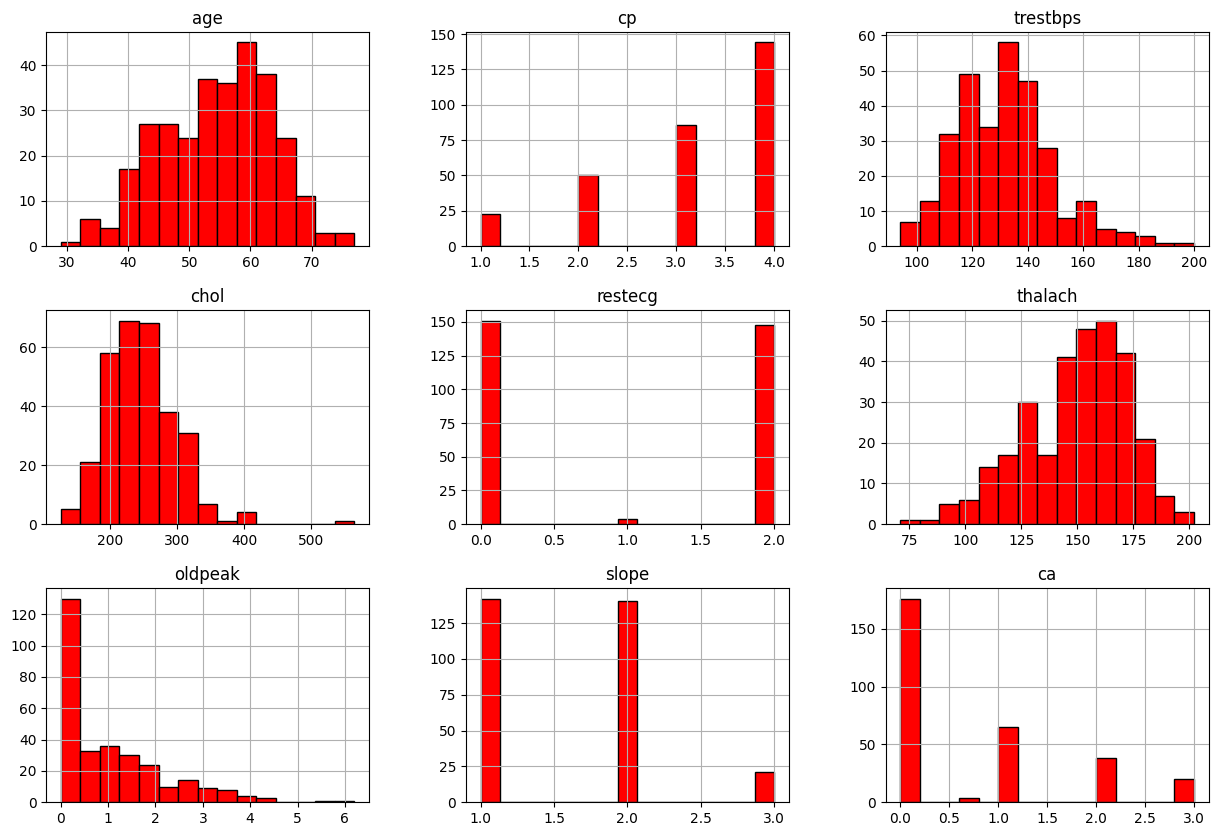

In [22]:
# Histogram for continuous variables
cols = ["age", "cp", "trestbps", "chol", "restecg",
        "thalach", "oldpeak", "slope", "ca"]

df[cols].hist(bins=15, figsize=(15, 10),
              color='red', edgecolor='black')


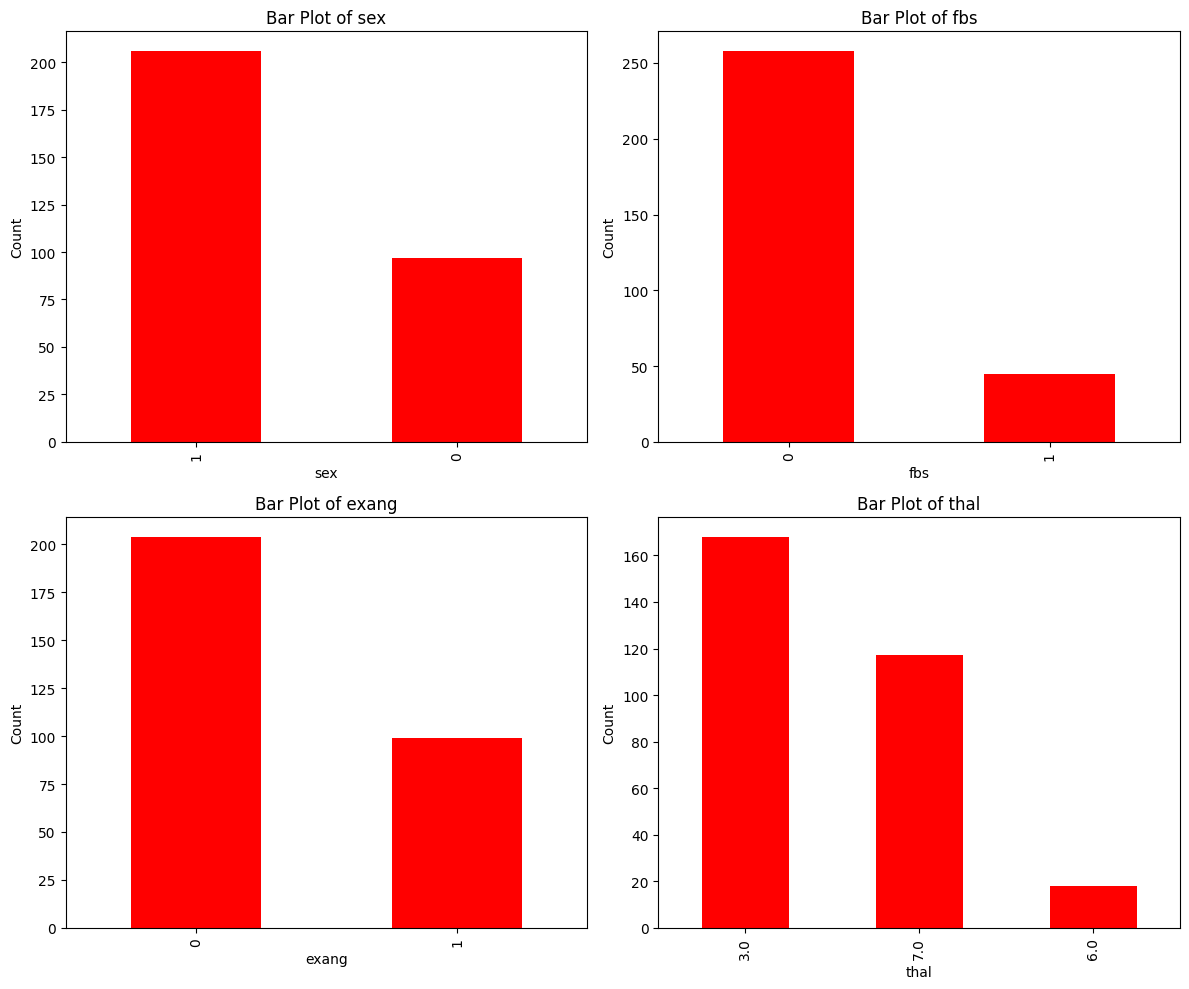

In [23]:
# Bar plots for categorical variables
cols = ["sex", "fbs", "exang", "thal"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, col in zip(axes.flat, cols):
    df[col].value_counts().plot(kind='bar', color='red', ax=ax)
    ax.set(title=f'Bar Plot of {col}',
           xlabel=col,
           ylabel='Count')

plt.tight_layout()
plt.show()


<Axes: xlabel='target'>

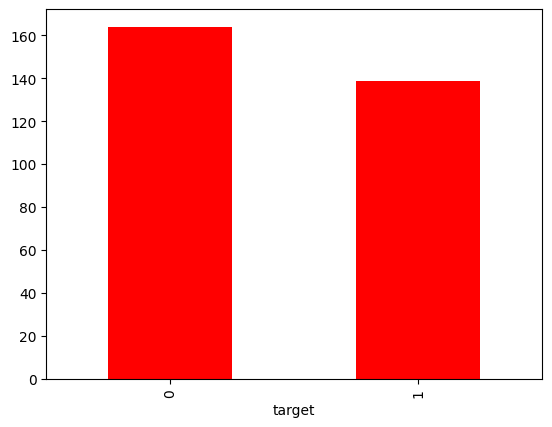

In [24]:
# Count plot for the target variable
counts = df["target"].value_counts()
counts.plot(kind='bar', color='red')


Text(0.5, 1.0, 'Predictor & Target Variables Boxplot')

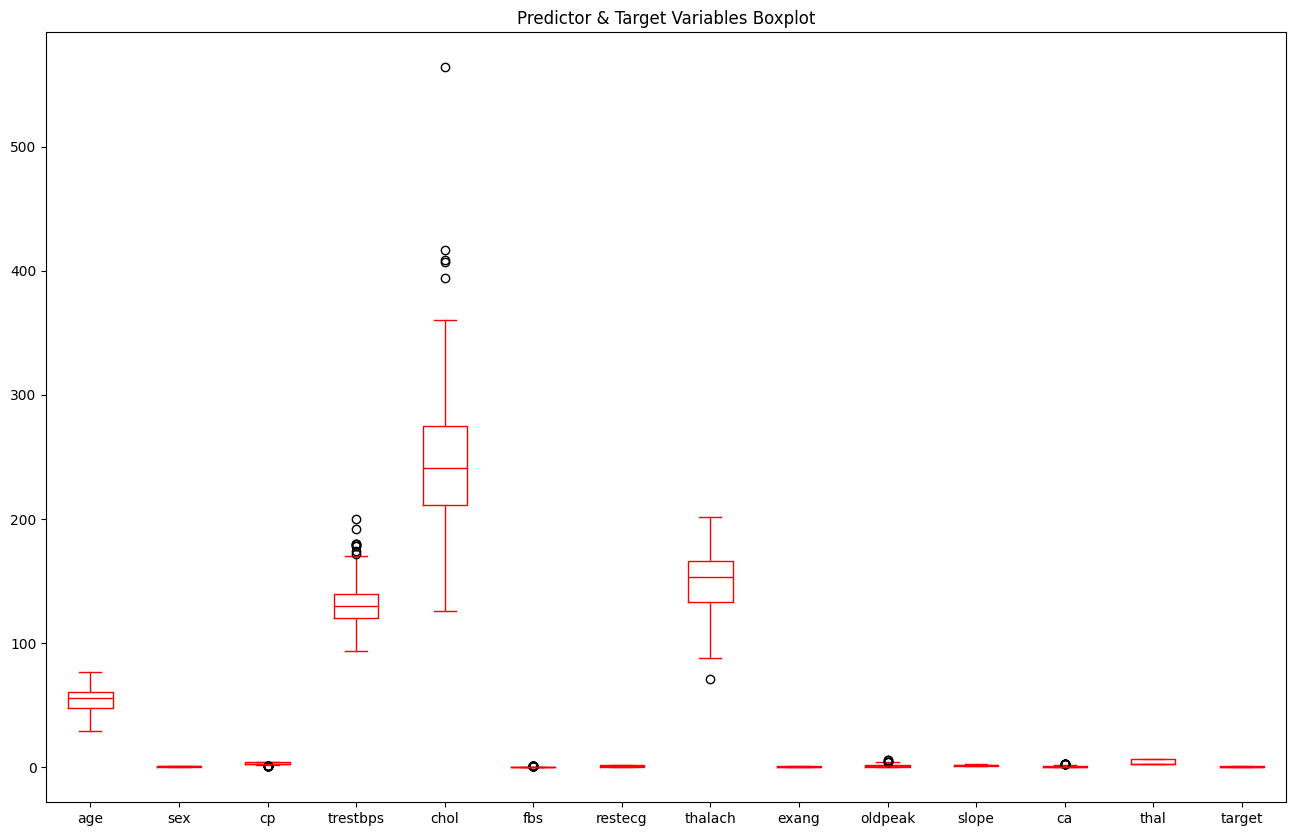

In [25]:
# Identify potential outliers using boxplots
df.plot.box(figsize = (16, 10), color = 'red')
plt.title("Predictor & Target Variables Boxplot")

**Task 1.3:** Explore relationships with target variable    <br>
- Create side-by-side boxplots of continuous predictors by target class  <br>
- Create stacked bar charts for categorical predictors by target class  <br>
- Identify which variables show clear differences between classes  <br>

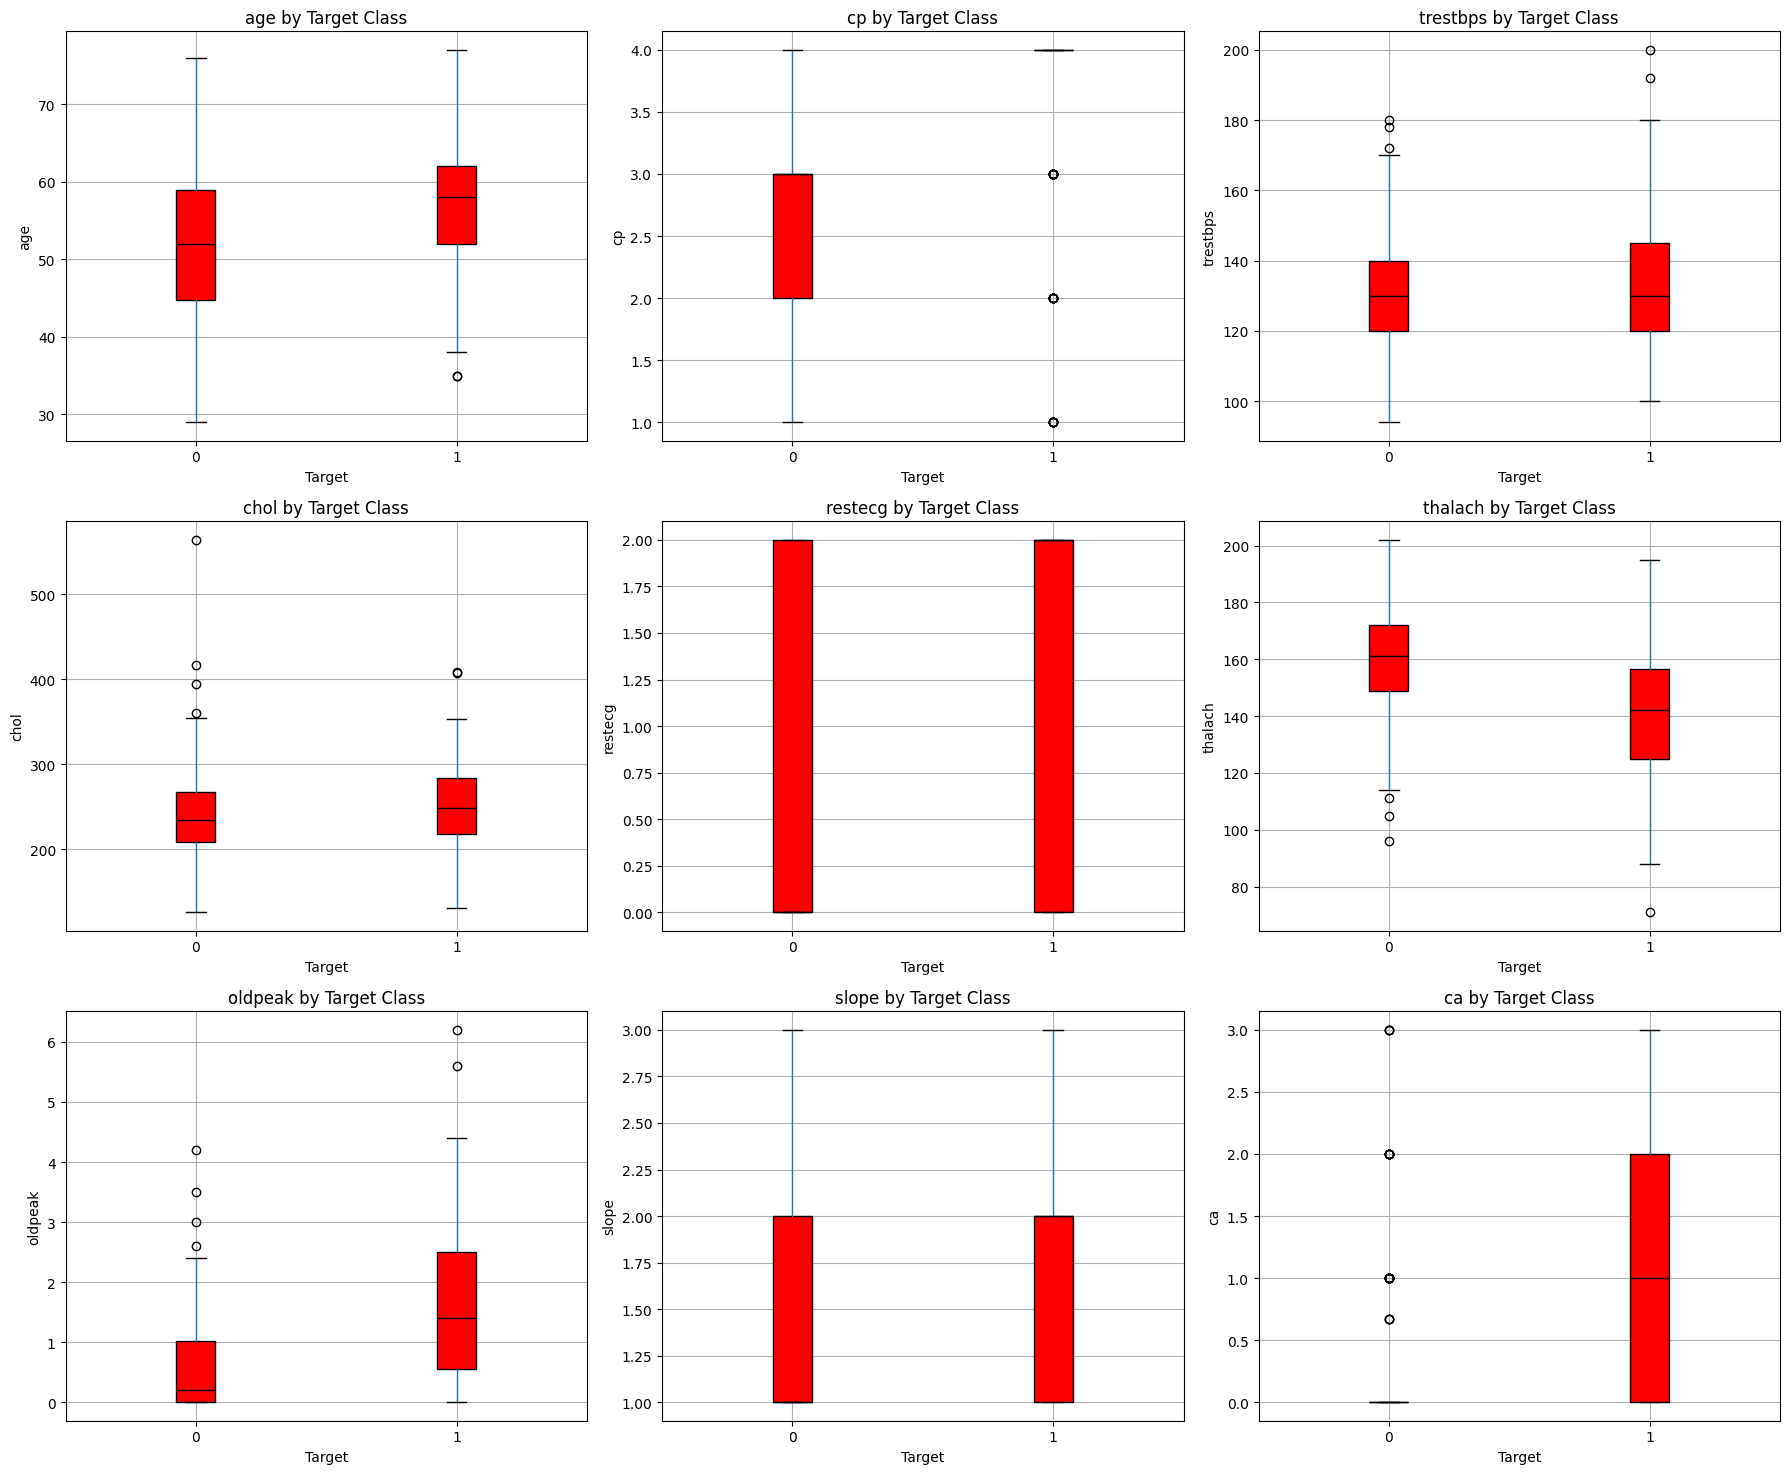

In [26]:
# Boxplot of continuous predictors by target class
continuous_cols = ["age", "cp", "trestbps", "chol", "restecg",
                   "thalach", "oldpeak", "slope", "ca"]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for ax, col in zip(axes.flat, continuous_cols):
    df.boxplot(column=col, by='target', ax=ax, patch_artist=True,
               boxprops=dict(facecolor='red', color='black'),
               medianprops=dict(color='black'))

    ax.set(title=f'{col} by Target Class',
           xlabel='Target',
           ylabel=col)

plt.suptitle('')
plt.tight_layout()
plt.show()


 ***Model Fit and Deviance***

 The Logit Regression results indicate a statistically significant model with a strong fit relative to the baseline.

 - Log-Likelihood: -104.85.
 - LL-Null: -208.99 (the log-likelihood of a model with no predictors).
 - Deviance: Calculated as 209.70 ($-2 \times -104.85$), representing the lack of fit compared to a perfect model.
 - Pseudo R-squared: 0.4983, suggesting the model explains nearly 50% of the uncertainty in the target variable.
 - LLR p-value: $2.699 \times 10^{-37}$, confirming the predictors as a group are highly significant.

 ***Analysis of Key Predictors***

 - By examining the coefficients and the exponentiated coefficients (odds ratios), we can determine the impact of each variable:Most Significant Predictor (ca): The number of major vessels (ca) has the highest coefficient (1.1324) and the largest odds ratio (3.103). This means that for every additional vessel identified, the odds of having the target condition increase by approximately 3.1 times, holding all else constant.
 - Significant Symptoms: Both chest pain (cp) and exercise-induced angina (exang) are statistically significant ($p < 0.05$). Specifically, cp increases the odds of the target by 1.80 times, while exang increases them by 1.62 times.
 - Thalassemia (thal): This is a highly significant categorical predictor ($p = 0.001$) with an odds ratio of 1.86, indicating it is a strong differentiator for heart disease likelihood.
 - Maximum Heart Rate (thalach): This variable shows a negative coefficient (-0.4517) and an odds ratio of 0.636. This implies that higher maximum heart rates are associated with a decrease in the odds of the target condition.
 - Non-Significant Predictors: Features such as age ($p = 0.581$), chol ($p = 0.180$), and fbs ($p = 0.145$) do not reach the standard threshold for statistical significance in this specific model.

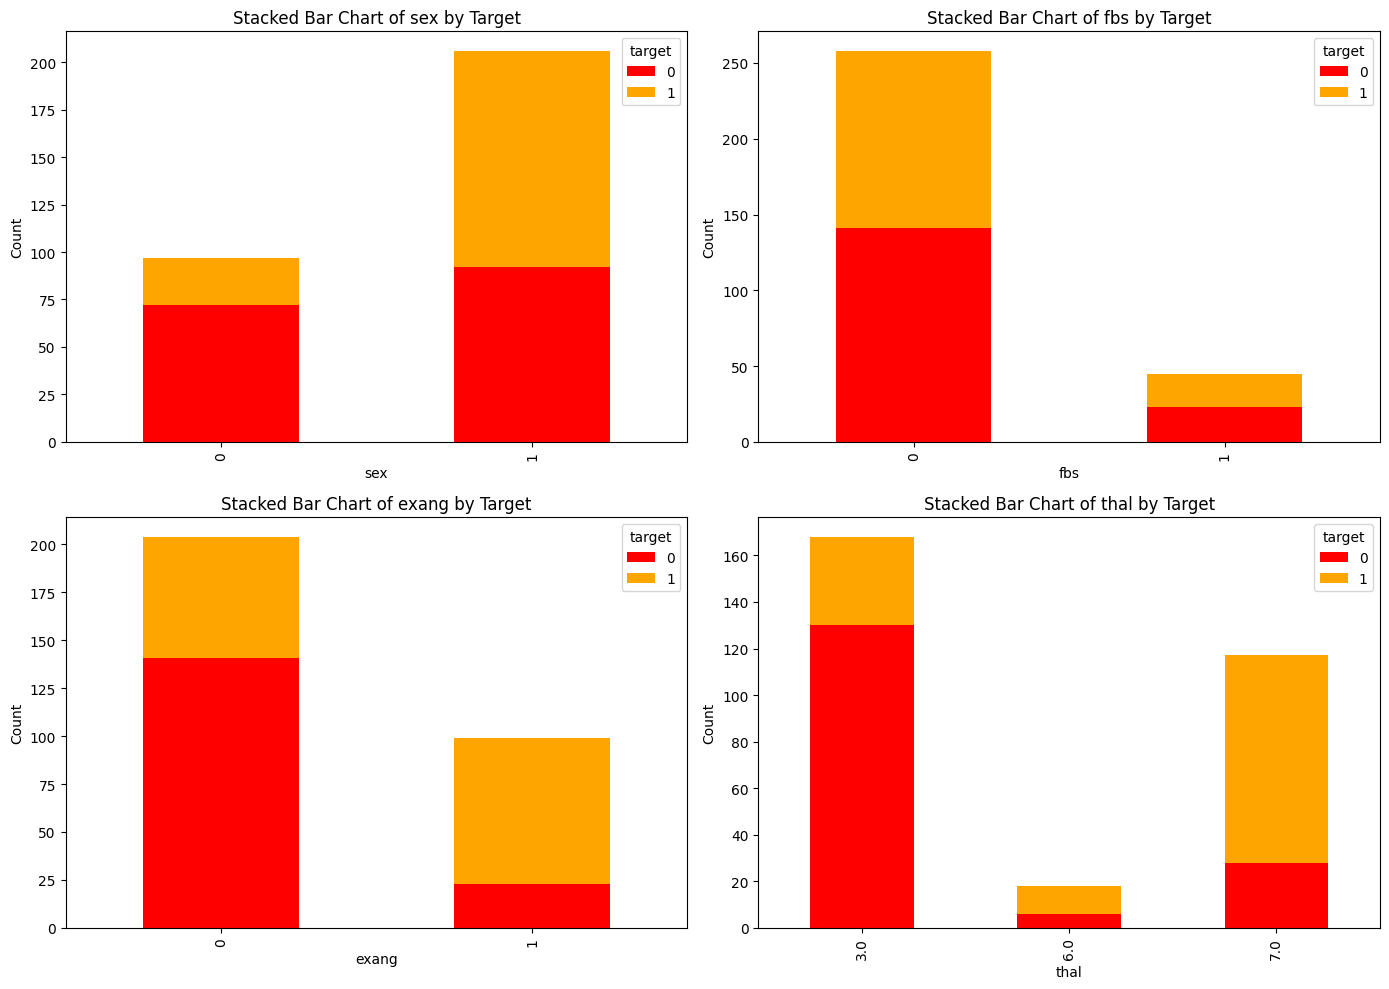

In [27]:
# Define categorical predictor columns
categorical_cols = ["sex", "fbs", "exang", "thal"]

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop through each column and corresponding subplot axis
for ax, col in zip(axes.flat, categorical_cols):

    # Create cross-tabulation and plot stacked bar chart
    pd.crosstab(df[col], df['target']).plot(
        kind='bar',
        stacked=True,
        color=['red', 'orange'],
        ax=ax
    )

    # Set subplot title and axis labels
    ax.set(title=f'Stacked Bar Chart of {col} by Target',
           xlabel=col,
           ylabel='Count')


plt.tight_layout()
plt.show()


***The four categorical variables analyzed show distinct patterns in how they correlate with the presence of heart disease:***

- Sex: There is a pronounced disparity between genders. The data indicates that males (1) exhibit a significantly higher frequency of heart disease compared to females (0).

- Exercise-Induced Angina (exang): This serves as a strong negative indicator. Patients who experience exercise-induced angina are statistically less likely to have heart disease in this dataset, while those without this symptom show a higher prevalence of the condition.

- Fasting Blood Sugar (fbs): Interestingly, patients with fasting blood sugar > 120 mg/dl show a lower overall count of heart disease. Conversely, the majority of heart disease cases are found among those with lower fasting blood sugar levels, though this group remains somewhat split.

- Thalassemia (thal): The type of Thalassemia is a critical differentiator. Patients with normal Thalassemia (3.0) have the highest correlation with the absence of heart disease. While data for fixed defects (6.0) is sparse, those with a reversible defect (7.0) represent the highest concentration of heart disease cases.

-------------------------------------------------------------------

**Part 2: Correlation Analysis**

**Task 2.1:** Compute and visualize correlation matrix <br>
- Calculate correlations between all numeric variables <br>
- Create a heatmap with annotations <br>
- Include the target variable in the correlation analysis <br>

In [28]:
# Calculate the correlation between all numeric variables using corr function
numeric_var = ["target", "age", "cp", "trestbps", "chol", "restecg", "thalach", "oldpeak", "slope", "ca"]

df_corr = df[numeric_var].corr()
print(df_corr)

            target       age        cp  trestbps      chol   restecg  \
target    1.000000  0.223120  0.414446  0.150825  0.085164  0.169202   
age       0.223120  1.000000  0.104139  0.284946  0.208950  0.148868   
cp        0.414446  0.104139  1.000000 -0.036077  0.072319  0.067505   
trestbps  0.150825  0.284946 -0.036077  1.000000  0.130120  0.146560   
chol      0.085164  0.208950  0.072319  0.130120  1.000000  0.171043   
restecg   0.169202  0.148868  0.067505  0.146560  0.171043  1.000000   
thalach  -0.417167 -0.393806 -0.334422 -0.045351 -0.003432 -0.083389   
oldpeak   0.424510  0.203805  0.202277  0.189171  0.046564  0.114133   
slope     0.339213  0.161770  0.152050  0.117382 -0.004062  0.133946   
ca        0.457598  0.359489  0.232332  0.098707  0.118525  0.127487   

           thalach   oldpeak     slope        ca  
target   -0.417167  0.424510  0.339213  0.457598  
age      -0.393806  0.203805  0.161770  0.359489  
cp       -0.334422  0.202277  0.152050  0.232332  
tre

<Axes: >

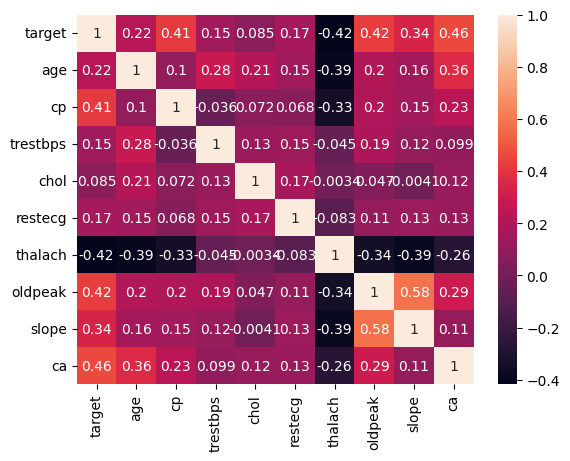

In [29]:
# Create heatmap using seaborn
sns.heatmap(df_corr, cmap = 'rocket', annot = True)

**Task 2.2:** Interpret correlations <br>
- Which predictors are most strongly correlated with the target variable? <br>
- Which predictor pairs show high correlation (potential multicollinearity)? <br>
- List any correlation coefficients > 0.7 or < -0.7 between predictors<br>


***Predictors Most Strongly Correlated with the Target***

- The "target" row (or column) indicates how each feature relates to the presence of heart disease. The most significant predictors (those with the highest absolute values) are:

- ca (0.46): The number of major vessels colored by fluoroscopy shows the strongest positive correlation with the target.

- oldpeak (0.42): ST depression induced by exercise relative to rest is the second strongest positive predictor.

- cp (0.41): Chest pain type also shows a strong positive correlation, suggesting it is a key indicator.

- thalach (-0.42): Maximum heart rate achieved shows a strong negative correlation, meaning as maximum heart rate decreases, the likelihood of the target condition typically increases.

***High Correlation Between Predictor Pairs***

- Looking for potential multicollinearity (where two independent variables are highly correlated with each other), the following pair stands out:

- slope and oldpeak (0.58): This is the strongest relationship between any two predictors in the dataset. While 0.58 indicates a moderate-to-strong positive relationship, it is generally below the typical threshold for severe multicollinearity in most statistical models.

- age and ca (0.36): There is a moderate positive correlation here, which is logically consistent as vessel issues often increase with age.

***Correlation Coefficients > 0.7 or < -0.7***

- There are no correlation coefficients between predictors that exceed 0.7 or fall below -0.7.

- The highest value between two predictors is 0.58 (slope and oldpeak). This is a good sign for your model, as it suggests that each variable provides relatively distinct information and you likely won't need to drop any features due to extreme redundancy.

-----------------------------------------------------------------

**Part 3: Full Logistic Regression Model**

**Task 3.1:** Build the full model <br>
- Create a logistic regression model using ALL predictor variables<br>
- Display the model summary with coefficients, standard errors, and p-values<br>
- Report the log-likelihood and deviance; refer to the programming for DSA notes on the definition of deviance.<br>


In [30]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(
    df.drop(columns="target")
)

df_scaled = pd.DataFrame(
    X_scaled,
    columns=df.columns[:-1]
)
df_scaled["target"] = df["target"].values

In [31]:
# Logistic regression model using all predictor variables
X = df_scaled.drop(columns="target")
y = df_scaled["target"]

X_const = sm.add_constant(X)
model_initial = sm.Logit(y, X_const).fit()
model_initial.summary()
model_initial.aic

Optimization terminated successfully.
         Current function value: 0.346024
         Iterations 7


np.float64(237.69062718383083)

In [32]:
np.exp(model_initial.params)

,0
const,0.916139
age,0.887996
sex,1.882321
cp,1.805646
trestbps,1.512649
chol,1.297599
fbs,0.758895
restecg,1.271639
thalach,0.636544
exang,1.622141


 ***Model Fit and Deviance***

 The Logit Regression results indicate a statistically significant model with a strong fit relative to the baseline.

 - Log-Likelihood: -104.85.
 - LL-Null: -208.99 (the log-likelihood of a model with no predictors).
 - Deviance: Calculated as 209.70 ($-2 \times -104.85$), representing the lack of fit compared to a perfect model.
 - Pseudo R-squared: 0.4983, suggesting the model explains nearly 50% of the uncertainty in the target variable.
 - LLR p-value: $2.699 \times 10^{-37}$, confirming the predictors as a group are highly significant.

 ***Analysis of Key Predictors***

 - By examining the coefficients and the exponentiated coefficients (odds ratios), we can determine the impact of each variable:Most Significant Predictor (ca): The number of major vessels (ca) has the highest coefficient (1.1324) and the largest odds ratio (3.103). This means that for every additional vessel identified, the odds of having the target condition increase by approximately 3.1 times, holding all else constant.
 - Significant Symptoms: Both chest pain (cp) and exercise-induced angina (exang) are statistically significant ($p < 0.05$). Specifically, cp increases the odds of the target by 1.80 times, while exang increases them by 1.62 times.
 - Thalassemia (thal): This is a highly significant categorical predictor ($p = 0.001$) with an odds ratio of 1.86, indicating it is a strong differentiator for heart disease likelihood.
 - Maximum Heart Rate (thalach): This variable shows a negative coefficient (-0.4517) and an odds ratio of 0.636. This implies that higher maximum heart rates are associated with a decrease in the odds of the target condition.
 - Non-Significant Predictors: Features such as age ($p = 0.581$), chol ($p = 0.180$), and fbs ($p = 0.145$) do not reach the standard threshold for statistical significance in this specific model.

**Task 3.2:** Initial model interpretation <br>
- How many predictors are statistically significant at α = 0.05? <br>
- What is the overall model significance (likelihood ratio test)? Prog for DSA notes. <br>

 ***Statistically Significant Predictors ($\alpha = 0.05$)***

 A predictor is considered statistically significant if its P-value ($P>|z|$) is less than $0.05$. Based on the results table, there are 6 statistically significant predictors:
 - sex ($p = 0.005$)
 - cp ($p = 0.001$)
 - trestbps ($p = 0.028$)
 - exang ($p = 0.012$)
 - ca ($p = 0.000$)
 - thal ($p = 0.001$)<br>

 Note: thalach ($p =     0.051$) narrowly misses the significance threshold.

 ***Overall Model Significance (Likelihood Ratio Test)***
 The Likelihood Ratio (LR) test determines if the model with predictors fits the data significantly better than a null model (a model with only an intercept).
 - Log-Likelihood: -104.85
 - LL-Null: -208.99
 - LLR p-value: $2.699 \times 10^{-37}$<br>

 Since the LLR p-value is essentially zero (well below $\alpha = 0.05$), we reject the null hypothesis. This indicates that the overall model is highly significant, meaning the included predictors provide a statistically superior fit compared to a model with no independent variables.

------------------------------------------------------------------

**Part 4: Linearity Assumption - Log Odds**

**Task 4.1:** Test linearity of continuous predictors to log odds For each continuous predictor, test
the linearity assumption using one of these methods:<br>
- Box-Tidwell test: Add interaction terms between continuous variables and their logarithms

In [33]:
# continuous_cols = ["age", "cp", "trestbps", "chol", "restecg", "thalach", "oldpeak", "slope", "ca"]

df_scaled["age_log"] = df_scaled["age"] * np.log(np.abs(df_scaled["age"]))

bt_model = sm.Logit(
    y,
    sm.add_constant(df_scaled[["age", "age_log"]])
).fit()

bt_model.summary()

Optimization terminated successfully.
         Current function value: 0.649773
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Feb 2026   Pseudo R-squ.:                 0.05794
Time:                        09:43:59   Log-Likelihood:                -196.88
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.506e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2406      0.123     -1.960      0.050      -0.481    1.57e-06
age            0.7232      0.151      4.785      0.000       0.427       1.019
age_log       -0.8357      0.283     -2.952      0.003      -1.391      -0.281
==============================================================================
"""

**Task 4.2:** Document findings <br>
- Which continuous variables satisfy the linearity assumption?<br>
- Which variables violate the assumption?<br>
- Report the statistical findings.<br>

--------------------------------------------------------

**Part 5: Multicollinearity Assessment**

**Task 5.1:** Calculate Variance Inflation Factor (VIF) <br>
- Compute VIF for each predictor in the full model<br>
- Create a table or plot displaying VIF values<br>
- Use VIF > 5 or VIF > 10 as thresholds for concern<br>

In [34]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_data

,Feature,VIF
0,age,1.488150
1,sex,1.300071
2,cp,1.317950
3,trestbps,1.199010
4,chol,1.143383
5,fbs,1.074161
6,restecg,1.087765
7,thalach,1.626866
8,exang,1.384468
9,oldpeak,1.752864


**Task 5.2:** Interpret and address multicollinearity <br>
- Which predictors exhibit problematic multicollinearity?<br>
- How might multicollinearity affect coefficient estimates and p-values?<br>
- Suggest which variables could be removed or combined<br>


***Predictors Exhibiting Problematic Multicollinearity***

In statistical modeling, a VIF value greater than 5 or 10 typically indicates problematic multicollinearity.

- Current VIF Levels: All of the predictors have VIF values between 1.07 and 1.75.
- Findings: None of the predictors exhibit problematic multicollinearity. The highest VIF is 1.75 for oldpeak, which is well below the common threshold of concern.

***Impact of Multicollinearity on the Model***

Even though your current model does not suffer from high multicollinearity, it is important to understand how it would affect your results if it were present:

- Coefficient Instability: High multicollinearity makes coefficient estimates very sensitive to small changes in the model or data, causing them to swing wildly.
- Inflated P-values: It increases the standard errors of the coefficients, which can make significant predictors appear statistically insignificant (higher p-values).
- Interpretation Difficulty: It becomes difficult to isolate the individual effect of a single predictor because it is "tangled up" with another variable

 ***Suggested Variable Adjustments***

 Since all VIF values are currently low ($< 2$), you do not need to remove or combine any variables to fix multicollinearity. However, for the sake of model parsimony (simplicity), you might consider the following:

 - Oldpeak and Slope: These have the highest correlation in your matrix ($0.58$) and relatively higher VIFs ($1.75$ and $1.68$ respectively). While not problematic yet, they both relate to ST-segment changes during exercise. If you wanted a simpler model, these are the most redundant pair.
 - Non-Significant Predictors: You may consider removing predictors with very high p-values, such as age ($p=0.581$) or restecg ($p=0.185$), to focus only on the most impactful drivers of heart disease.

-----------------------------------------------------------------

**Part 6: Goodness of Fit - Hosmer-Lemeshow Test**

**Task 6.1:** Perform Hosmer-Lemeshow test on full model <br>
- Conduct the Hosmer-Lemeshow goodness-of-fit test (typically with g = 10 groups) <br>
- Report the test statistic, degrees of freedom, and p-value <br>
- Create a calibration plot showing observed vs. expected probabilities<br>


In [35]:
def hosmer_lemeshow(y_true, y_prob, g=10):
    data = pd.DataFrame({"y": y_true, "p": y_prob})
    data["group"] = pd.qcut(data["p"], g)

    obs = data.groupby("group")["y"].sum()
    exp = data.groupby("group")["p"].sum()
    n = data.groupby("group")["y"].count()

    hl_stat = np.sum((obs - exp)**2 / (exp * (1 - exp/n)))
    df_hl = g - 2
    p_value = 1 - stats.chi2.cdf(hl_stat, df_hl)

    return hl_stat, df_hl, p_value

In [36]:
y_probs = model_initial.predict(X_const)
hl_stat, df_hl, p_value = hosmer_lemeshow(y, y_probs)

print("Test Statistic:", hl_stat)
print("Degree of Freedom:", df_hl)
print("p-value:", p_value)

Test Statistic: 6.611234666857377
Degree of Freedom: 8
p-value: 0.5790975812163663


/tmp/ipython-input-2185564360.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs = data.groupby("group")["y"].sum()
/tmp/ipython-input-2185564360.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp = data.groupby("group")["p"].sum()
/tmp/ipython-input-2185564360.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n = data.groupby("group")["y"].count()


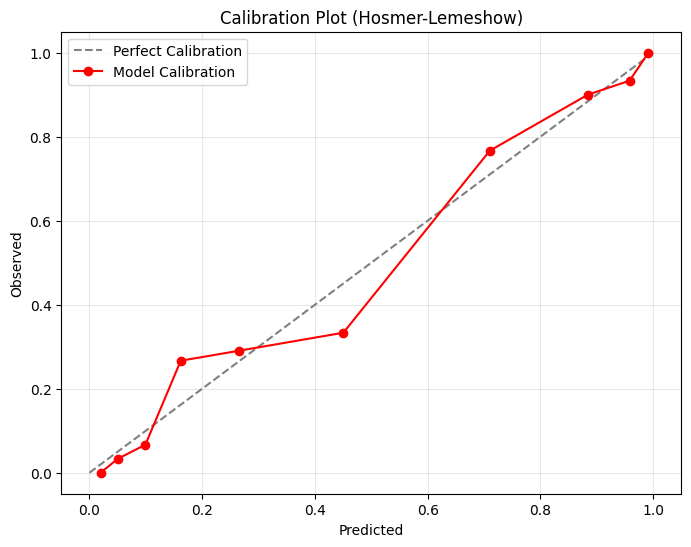

In [37]:
hlcalibration_df = pd.DataFrame({"y_true": y, "y_prob": y_probs})

hlcalibration_df['bin'] = pd.qcut(hlcalibration_df['y_prob'], 10, labels=False, duplicates='drop')
observed = hlcalibration_df.groupby('bin')['y_true'].mean()
predicted = hlcalibration_df.groupby('bin')['y_prob'].mean()
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.plot(predicted, observed, marker='o', color='red', label='Model Calibration')

plt.title('Calibration Plot (Hosmer-Lemeshow)')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Task 6.2:** Interpret the results<br>
- Does the model fit the data well? (p-value > 0.05 indicates good fit)<br>
- Are there systematic patterns in the calibration plot?<br>
- What does this tell you about the model's predictive ability?<br>

## 6.2 Answers
- With the Hosmer-Lemeshow being a "Goodness of Fit" test, the goal is to actually have a high p-value as opposed to most tests where the goal is to have a low p-value. The model seemsto be a good fit for the data as the p-value of 0.58 far exceeds 0.05 which is the standard threshold for a good fit.

- The fit is generally strong, reflecting the good fit of the data for the model. The red line jumping above the dotted line shows that low risk patients have under-prediction, where actual patients with low-risk of heart disease may not be predicted by the model. The opposite is true for the middle-risk patients, where the predicted values slightly exceeds the observed values, which means patients may be predicted to have medium-risk of heart disease when in reality they do not. The model performs strongly at high-risk heart disease patients, where it most often than not predicts them correctly.

- This means the model's predictive ability is best when used on high-risk patients, and must be used with caution in low to medium risk patients, as it runs the problem of misdiagnosing them.

------------------------------------------------------

**Part 7: Alternative Model Building - Method 1**

**Task 7.1:** Build your first alternative model Choose one method:<br>
- Manual feature selection based on clinical/domain knowledge<br>
- Best subset selection<br>


In [38]:
manual_features = ["sex", "cp", "trestbps", "exang", "ca", "thal"]

X_manual = df_scaled[manual_features]
y_manual = df_scaled["target"]

X_manual_const = sm.add_constant(X_manual)
model_manual = sm.Logit(y_manual, X_manual_const).fit()


print(model_manual.summary())

Optimization terminated successfully.
         Current function value: 0.385917
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Fri, 20 Feb 2026   Pseudo R-squ.:                  0.4405
Time:                        09:44:00   Log-Likelihood:                -116.93
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.531e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1417      0.169     -0.840      0.401      -0.472       0.189
sex            0.4576      0.

In [39]:
vif_manual = pd.DataFrame()
vif_manual["Feature"] = X_manual.columns
vif_manual["VIF"] = [
    variance_inflation_factor(X_manual.values, i)
    for i in range(X_manual.shape[1])
]

vif_manual

,Feature,VIF
0,sex,1.209655
1,cp,1.269727
2,trestbps,1.054019
3,exang,1.261852
4,ca,1.113701
5,thal,1.408184


In [40]:
print("MANUAL AIC:",model_manual.aic)
print("MANUAL BIC:",model_manual.bic)
print("INITIAL AIC:",model_initial.aic)
print("INITIAL BIC:",model_initial.bic)

MANUAL AIC: 247.8656815424117
MANUAL BIC: 273.86181118097727
INITIAL AIC: 237.69062718383083
INITIAL BIC: 289.682886460962


In [41]:
log_reg = LogisticRegression(solver='liblinear', random_state=911)
kf = KFold(n_splits=5, shuffle=True, random_state=911)
manual_cv = cross_val_score(log_reg, X_manual, y_manual, cv=kf, scoring='accuracy')
# ========================================================================
initial_cv = cross_val_score(log_reg, X, y, cv=kf, scoring='accuracy')

print("MEAN Manual CV:", manual_cv.mean())
print("MEAN Initial CV:", initial_cv.mean())

MEAN Manual CV: 0.8218032786885244
MEAN Initial CV: 0.8252459016393443


**Task 7.2:** Document your approach<br>
- Clearly state which method you chose and why<br>
- Describe the selection criterion used (AIC, BIC, cross-validation)<br>
- Report which variables were selected/retained<br>
- Display the final model summary<br>

## Task 7.2 Answers
- The manual feature selection was chosen as the full model only had half of the features as significant. This shows drove the motivation to create a model with only the significant features in order to see if having only these features would improve predictive power.

- The initial (full) model has a lower AIC which suggests that those extra 7 variables provide enough information to be mathematically useful.
- The BIC however is lower for the manual model, which suggests that the manually selected variables are the true core predictors and the other predictors were simply noise that the AIC tolerated which the BIC didn't
- The cross validation only dropped by ~0.3%. With the accuracy between the two models being relatively the same, the manually selected model performs better in a real clinical setting as it involves only collecting half of the data points which is sure to be easier and more realistic.

In [42]:
print(model_manual.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Fri, 20 Feb 2026   Pseudo R-squ.:                  0.4405
Time:                        09:44:00   Log-Likelihood:                -116.93
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.531e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1417      0.169     -0.840      0.401      -0.472       0.189
sex            0.4576      0.189      2.423      0.015       0.087       0.828
cp             0.6164      0.172      3.577      0.0

-------------------------------------

**Part 8: Alternative Model Building - Method 2**

**Task 8.1:** Build your second alternative model Choose a DIFFERENT method from Part 7: <br>
- Model it using decision tree-based feature importance then logistic regression<br>
- Stepwise selection (forward, backward, or both)<br>



In [43]:
import statsmodels.api as sm

X = df.drop("target", axis=1)
y = df["target"]

X = sm.add_constant(X)

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.346024
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Fri, 20 Feb 2026   Pseudo R-squ.:                  0.4983
Time:                        09:44:00   Log-Likelihood:                -104.85
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.699e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6139      2.856     -2.666      0.008     -13.211      -2.017
age           -0.0132      0.

In [49]:
X2 = df.drop(columns=["target", "age"])
y = df["target"]

X2 = sm.add_constant(X2)
model2 = sm.Logit(y, X2).fit()
print(model2.summary())

model2.aic

Optimization terminated successfully.
         Current function value: 0.346529
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Fri, 20 Feb 2026   Pseudo R-squ.:                  0.4976
Time:                        09:46:00   Log-Likelihood:                -105.00
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 7.304e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3900      2.494     -3.364      0.001     -13.278      -3.502
sex            1.3869      0.

np.float64(235.99681132897558)

In [50]:
X3 = df.drop(columns=["target", "age", "chol"])
y = df["target"]

X3 = sm.add_constant(X3)
model3 = sm.Logit(y, X3).fit()
print(model3.summary())
print(model3.aic)

Optimization terminated successfully.
         Current function value: 0.349201
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                           11
Date:                Fri, 20 Feb 2026   Pseudo R-squ.:                  0.4937
Time:                        09:46:43   Log-Likelihood:                -105.81
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 3.546e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3443      2.318     -3.168      0.002     -11.888      -2.800
sex            1.1678      0.

In [51]:
X4 = df.drop(columns=["target", "age", "chol", "oldpeak"])
y = df["target"]

X4 = sm.add_constant(X4)
model4 = sm.Logit(y, X4).fit()
print(model4.summary())
print(model4.aic)

Optimization terminated successfully.
         Current function value: 0.352648
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                           10
Date:                Fri, 20 Feb 2026   Pseudo R-squ.:                  0.4887
Time:                        09:47:25   Log-Likelihood:                -106.85
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.068e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5271      2.309     -3.260      0.001     -12.052      -3.002
sex            1.2445      0.

**Task 8.2:** Document your approach<br>
- State your method and rationale<br>
- Describe the tuning process (if applicable) <br>
- Report which variables/features were used<br>
- Display the final model summary<br>

Backward elimination was performed beginning with the full logistic regression model. Predictors were removed iteratively based on the highest p-values while monitoring the Akaike Information Criterion (AIC).

Age (p = 0.581) was removed first, followed by cholesterol (p = 0.203). After removing cholesterol, the model achieved its lowest AIC value (235.616), indicating improved model parsimony without loss of explanatory power.

Further removal of the next feature with the highest p-value (oldpeak) led to an increase in the AIC, suggesting that the previous model provided the optimal balance between model complexity and fit.

The final stepwise model retained the following predictors:

sex, cp, trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, and thal.

---------------------------------------------

**Part 9: Model Evaluation and Comparison**

**Task 9.1:** Split data for evaluation <br>
- Create train-test split (80-20 or use cross-validation) <br>
- Ensure both classes are represented in both sets <br>

In [56]:
manual_X_train, manual_X_test, manual_y_train, manual_y_test = train_test_split(
    X_manual,
    y_manual,
    test_size=0.30,
    random_state=911,
    stratify=y_manual
)
#both classes
print("Manual train:",manual_y_train.value_counts(normalize=True))
print("Manual test:",manual_y_test.value_counts(normalize=True))

#==============================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=911,
    stratify=y
)
#both classes
print("Full train:",y_train.value_counts(normalize=True))
print("Full test:",y_test.value_counts(normalize=True))

Manual train: target
0    0.542453
1    0.457547
Name: proportion, dtype: float64
Manual test: target
0    0.538462
1    0.461538
Name: proportion, dtype: float64
Full train: target
0    0.542453
1    0.457547
Name: proportion, dtype: float64
Full test: target
0    0.538462
1    0.461538
Name: proportion, dtype: float64


**Task 9.2:** Calculate performance metrics for all three models For each model (Full Model,
Method 1, Method 2), calculate on TEST data: <br>
- Accuracy: (TP + TN) / Total<br>
- Precision: TP / (TP + FP)<br>
- Recall/Sensitivity: TP / (TP + FN)<br>
- F1 Score: 2 × (Precision × Recall) / (Precision + Recall)<br>
- AUC-ROC: Area under the ROC curve<br>

In [45]:
full_constant = sm.add_constant(X_train)
full_model_fit = sm.Logit(y_train, full_constant).fit(disp=0)

# Predict on Test
X_test_c = sm.add_constant(X_test)
full_probs = full_model_fit.predict(X_test_c)
full_preds = (full_probs > 0.5).astype(int)

print(classification_report(y_test, full_preds))
print("AUC-ROC:", roc_auc_score(y_test, full_probs))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        49
           1       0.83      0.69      0.75        42

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.79        91
weighted avg       0.80      0.79      0.79        91

AUC-ROC: 0.8765792031098154


In [46]:
manual_constant = sm.add_constant(manual_X_train)
man_model_fit = sm.Logit(manual_y_train, manual_constant).fit(disp=0)

man_test_c = sm.add_constant(manual_X_test)
man_probs = man_model_fit.predict(man_test_c)
man_preds = (man_probs > 0.5).astype(int)

print(classification_report(manual_y_test, man_preds))
print("AUC-ROC:", roc_auc_score(manual_y_test, man_probs))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        49
           1       0.85      0.67      0.75        42

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91

AUC-ROC: 0.8845966958211856


In [53]:
stepwise_features = [
    "sex", "cp", "trestbps", "fbs",
    "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal"
]

step_X_train = X_train[stepwise_features]
step_X_test = X_test[stepwise_features]

step_constant = sm.add_constant(step_X_train)
step_model_fit = sm.Logit(y_train, step_constant).fit(disp=0)

step_test_c = sm.add_constant(step_X_test)
step_probs = step_model_fit.predict(step_test_c)
step_preds = (step_probs > 0.5).astype(int)

print(classification_report(y_test, step_preds))
print("AUC-ROC:", roc_auc_score(y_test, step_probs))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        49
           1       0.83      0.69      0.75        42

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.79        91
weighted avg       0.80      0.79      0.79        91

AUC-ROC: 0.8838678328474247


**Task 9.3:** Create visualizations <br>
- Plot ROC curves for all three models on the same graph<br>
- Create confusion matrices for each model<br>
- Include optimal probability threshold determination<br>

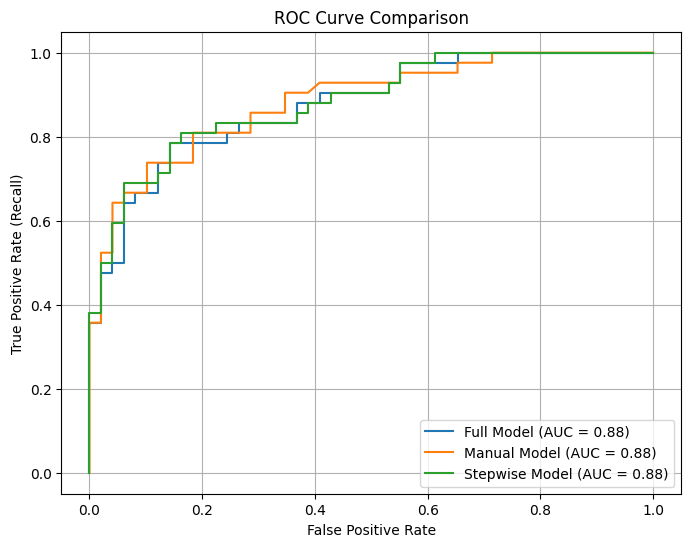

In [54]:
fpr_full, tpr_full, _ = roc_curve(y_test, full_probs)
fpr_manual, tpr_manual, _ = roc_curve(manual_y_test, man_probs)
fpr_step, tpr_step, _ = roc_curve(y_test, step_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, label=f'Full Model (AUC = {roc_auc_score(y_test, full_probs):.2f})')
plt.plot(fpr_manual, tpr_manual, label=f'Manual Model (AUC = {roc_auc_score(manual_y_test, man_probs):.2f})')
plt.plot(fpr_step, tpr_step, label=f'Stepwise Model (AUC = {roc_auc_score(y_test, step_probs):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

**Task 9.4:** Build comparison table <br>
![image.png](attachment:image.png)

**Task 9.5:** Select the best model <br>
- Which model performs best overall? <br>
- Is there a tradeoff between metrics (e.g., precision vs. recall)?<br>
- Consider model parsimony (number of predictors)<br>
- State your final model choice with justification<br>

The models' performance based on the comparison table are extremely similar, thus we look to consider Model Parsimony and choose the model that utilizes the least amount of predictors, in this case it's the Manual Model that only uses 6 predictors namely ["sex", "cp", "trestbps", "exang", "ca", "thal"]. This will be the final model we choose!

------------------------------------------

**Part 10: Best Model Interpretation**

**Task 10.1:** Interpret coefficients of the best model For each predictor in your chosen best model:<br>
- Report the coefficient (β)<br>
- Calculate and report the Odds Ratio (OR = e^β)<br>
- Interpret the odds ratio in context:<br>
  - For continuous variables: "A one-unit increase in [variable] is associated with a [OR] times change in odds of heart disease"
  - For binary variables: "[Group 1] has [OR] times the odds of heart disease compared to [Group 0]"


**Task 10.2:** Wald Test for statistical significance<br>
- Report the Wald test statistic for each coefficient<br>
- Report the p-value for each predictor<br>
- State which predictors are statistically significant at α = 0.05<br>

**Task 10.3:** Create an interpretation table

![image.png](attachment:image.png)

**Task 10.4:** Summarize key findings <br>
- Which 3 predictors have the strongest association with heart disease?<br>
- Are the directions of effects (positive/negative) consistent with medical knowledge?<br>
- Are there any surprising findings?<br>


----------------------------------------------------------

**Part 11: Executive Summary for Non-Technical Audience**

**Task 11.1:** Write an executive summary (1-5 paragraphs). Your summary should be
understandable to a healthcare administrator or policymaker with no statistical background.
Include:


1. Key Risk Factors Identified:
    - What are the most important factors that increase heart disease risk?
    - Use plain language (e.g., "older patients are more likely to have heart disease" instead of "age has a positive coefficient")
    - Include 2-3 visualizations that clearly show risk pattern

2. Model Explanation (Non-Technical):
    - Explain what the prediction model does without using jargon
    - Use analogies: "The model works like a checklist that weighs different risk factors"
    - Avoid terms like "logistic regression", "AUC", "log odds"

3. Model Performance in Plain Language:
    - How accurate are the predictions? (e.g., "The model correctly identifies 85% of heart disease cases")
    - What are the implications of false positives vs. false negatives?
    - Translate accuracy metrics into actionable insights

4. Clinical Recommendations:
    - Which risk factors should clinicians focus on during screening?
    - How can this model be used in practice?
    - What are the limitations and when should clinical judgment override the model?

**Writing Guidelines:**
- Replace statistical terms:
    - "Odds ratio of 2.5" → "2.5 times more likely"
    - "Statistically significant" → "Has a meaningful impact on risk"
    - "AUC of 0.85" → "The model is highly accurate at distinguishing between patients"
    - "Sensitivity" → "Ability to catch actual heart disease cases"
    - "Specificity" → "Ability to correctly rule out healthy patients"
- Use bullet points for key findings
- Focus on actionable insights
- Include clear recommendations


---------------------------------